# Lista de Exercícios 03 - Iago O. Lima - Eng. de Computação - 374851

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Perceptron

In [42]:
class Perceptron(object):
    """Perceptron classifier.
    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Adaline

In [43]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.
    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)


In [44]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.
    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value averaged over all
      training samples in each epoch.
        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.
        Returns
        -------
        self : object
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

### Carregando dataset e definindo colunas

In [45]:
features = ['ID','diagnosis','radius','texture', 'perimeter','area','smoothness','compactness','concavity',
           'concave_points','symmetry','fractal_dimension', 'radiusSE','textureSE','perimeterSE','areaSE',
           'smoothnessSE','compactenessSE','concavitySE','concave_pointsSE','symmetrySE','fractal_dimensionSE',
           'radiusW','textureSW','perimeterW','areaW','smoothnessW','compactnessW','concavityW','concave_pointsW',
           'symmetryW','fractal_dimensionW']
data = pd.read_csv('wdbc.csv',names=features)

### Analisando Dados

In [46]:
data.head()

,ID,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,...,radiusW,textureSW,perimeterW,areaW,smoothnessW,compactnessW,concavityW,concave_pointsW,symmetryW,fractal_dimensionW
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [47]:
data.describe()

,ID,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,...,radiusW,textureSW,perimeterW,areaW,smoothnessW,compactnessW,concavityW,concave_pointsW,symmetryW,fractal_dimensionW
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
ID                     569 non-null int64
diagnosis              569 non-null object
radius                 569 non-null float64
texture                569 non-null float64
perimeter              569 non-null float64
area                   569 non-null float64
smoothness             569 non-null float64
compactness            569 non-null float64
concavity              569 non-null float64
concave_points         569 non-null float64
symmetry               569 non-null float64
fractal_dimension      569 non-null float64
radiusSE               569 non-null float64
textureSE              569 non-null float64
perimeterSE            569 non-null float64
areaSE                 569 non-null float64
smoothnessSE           569 non-null float64
compactenessSE         569 non-null float64
concavitySE            569 non-null float64
concave_pointsSE       569 non-null float64
symmetrySE        

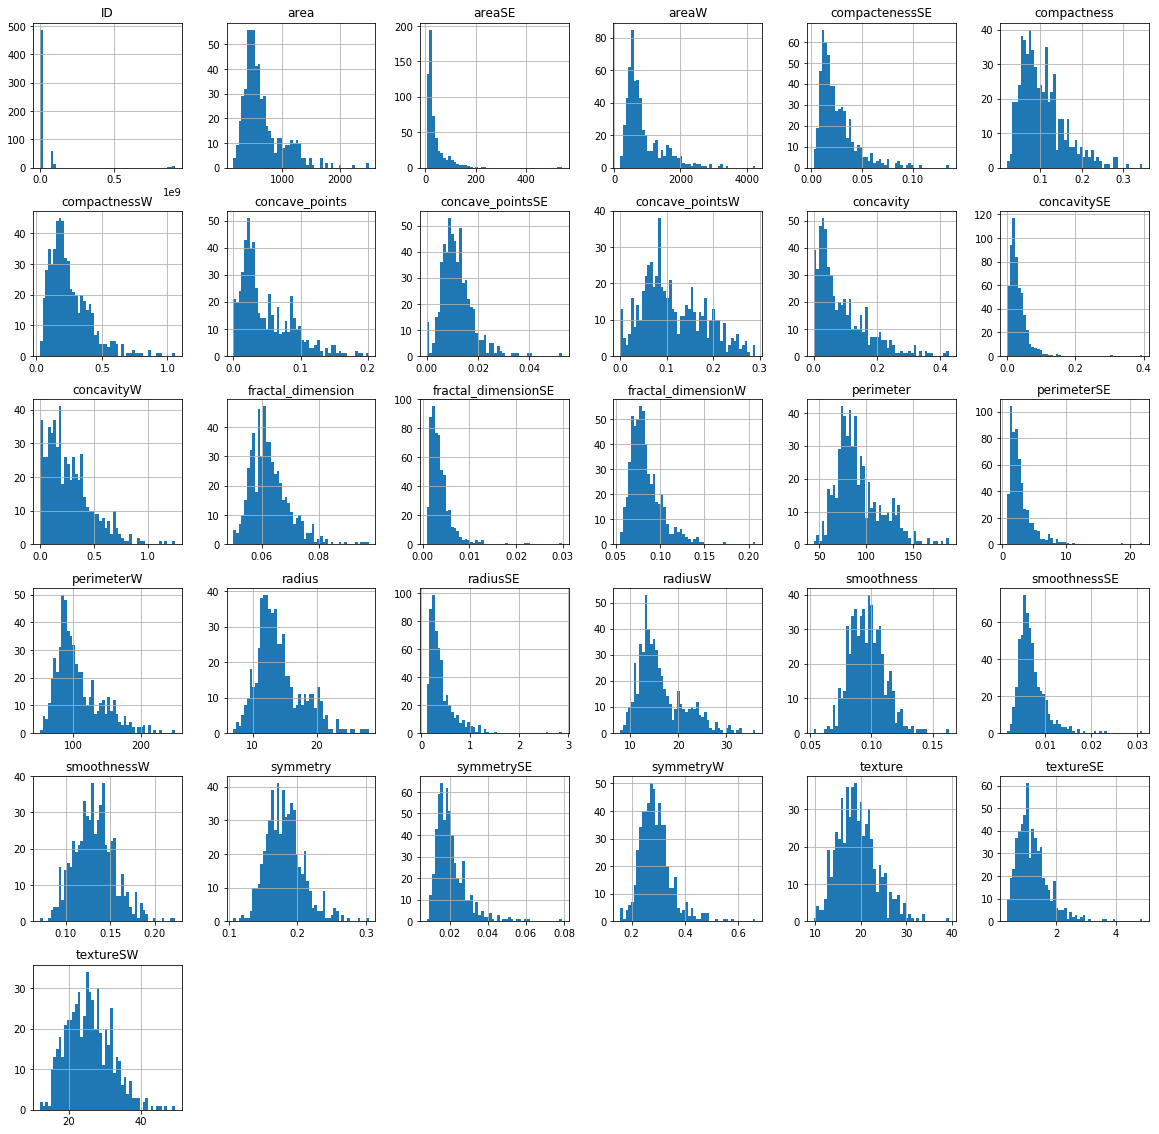

In [49]:
data.hist(bins=50, figsize=(20,20));

In [50]:
data.values
print(data)

           ID diagnosis  radius  texture  perimeter    area  smoothness  \
0      842302         M  17.990    10.38     122.80  1001.0     0.11840   
1      842517         M  20.570    17.77     132.90  1326.0     0.08474   
2    84300903         M  19.690    21.25     130.00  1203.0     0.10960   
3    84348301         M  11.420    20.38      77.58   386.1     0.14250   
4    84358402         M  20.290    14.34     135.10  1297.0     0.10030   
5      843786         M  12.450    15.70      82.57   477.1     0.12780   
6      844359         M  18.250    19.98     119.60  1040.0     0.09463   
7    84458202         M  13.710    20.83      90.20   577.9     0.11890   
8      844981         M  13.000    21.82      87.50   519.8     0.12730   
9    84501001         M  12.460    24.04      83.97   475.9     0.11860   
10     845636         M  16.020    23.24     102.70   797.8     0.08206   
11   84610002         M  15.780    17.89     103.60   781.0     0.09710   
12     846226         M  

In [51]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [52]:
data['diagnosis'] = np.where(data['diagnosis'] == 'M', 1, -1)

In [53]:
dataset = data.values[:,:]
np.random.seed(1)
np.random.shuffle(dataset)
dataset

array([[ 9.0656400e+05, -1.0000000e+00,  1.4690000e+01, ...,
         1.1080000e-01,  2.8270000e-01,  9.2080000e-02],
       [ 8.5715000e+04,  1.0000000e+00,  1.3170000e+01, ...,
         2.0880000e-01,  3.9000000e-01,  1.1790000e-01],
       [ 8.9167000e+05, -1.0000000e+00,  1.2950000e+01, ...,
         1.0560000e-01,  3.3800000e-01,  9.5840000e-02],
       ...,
       [ 8.5971700e+05,  1.0000000e+00,  1.7200000e+01, ...,
         1.8990000e-01,  3.3130000e-01,  1.3390000e-01],
       [ 8.8249602e+07, -1.0000000e+00,  1.4030000e+01, ...,
         7.9630000e-02,  2.2260000e-01,  7.6170000e-02],
       [ 8.5494100e+05, -1.0000000e+00,  1.3030000e+01, ...,
         5.0130000e-02,  1.9870000e-01,  6.1690000e-02]])

In [54]:
X = data.values[:, 2:]
y = data.values[:, 1]

In [55]:
X[:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [56]:
y[:5]

array([1., 1., 1., 1., 1.])

In [57]:
n_train = int(round(len(y) * 0.70))
X_train = X[:n_train,:]
y_train = y[:n_train]
X_test = X[n_train:,:]
y_test = y[n_train:]

In [58]:
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((569, 30), (569,), (398, 30), (398,), (171, 30), (171,))

In [59]:
np.average(X_train), np.average(y_train)

(64.0270647879062, -0.1306532663316583)

In [60]:
np.average(X_test), np.average(y_test)

(56.918383249122805, -0.543859649122807)

### Criação do modelo Perceptron e avaliação da métrica acurácia 

In [61]:
model = Perceptron(eta=0.00001, n_iter=20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = sum(y_pred == y_test) / y_test.shape[0]
accuracy

0.7485380116959064

### Criação do modelo Adaline e avaliação da métrica acurácia

In [74]:
model = AdalineGD(eta=0.00001, n_iter=20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = sum(y_pred == y_test) / y_test.shape[0]
accuracy

0.22807017543859648

### Criação do modelo Adaline  Gradiente Descentente Estocástico e avaliação da métrica acurácia

In [70]:
model = AdalineSGD(eta=0.00001, n_iter=20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = sum(y_pred == y_test) / y_test.shape[0]
accuracy

/home/iago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: overflow encountered in double_scalars
/home/iago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in add
/home/iago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:96: RuntimeWarning: invalid value encountered in greater_equal


0.7719298245614035

### Criação do modelo Perceptron do Scikit Learn e avaliação da métrica acurácia

In [75]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
model = Perceptron(tol=1e-3, random_state=0,eta0=0.001, n_iter=10)
model.fit(X_train, y_train)
model.score(X_test, y_test)

/home/iago/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.7894736842105263

### Criação do modelo tochastic Gradient Descent (SGD) do Scikit Learn e avaliação da métrica acurácia

In [76]:
from sklearn import linear_model
model = linear_model.SGDClassifier(max_iter=1000, tol=1e-3, eta0=0.001, n_iter=10)
model.fit(X_train, y_train)
model.score(X_test,y_test)

/home/iago/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.8187134502923976

In [78]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)
model.score(X_test, y_test)

/home/iago/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9415204678362573